ivancloudvm@gmail.com
<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analísis de Datos 

# Data Wrangling

## Objetivos: 

-   Manejo de datos perdidos
-   Correjir formato de datos
-   Estandarizar y normalizar datos

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Se observan signos "?" en el dataframe, son valores perdidos los cuales pueden arruinar nuestro análisis. Cómo trabajamos con datos perdidos?

Pasos para trabajar con datos perdidos:

1. Identificar los datos perdidos
2. Manejar los datos perdidos
3. Correjir el formato de los datos


## Identificar y manejar datos perdidos

### Convertir "?" a NaN

En el conjunto de datos, datos perdidos están marcados con la marca "?". Vamos a reemplazar "?" con NaN (Not a Number), el cual es la marca default de Python para datos perdidos, por razones de velocidad computacional y conveniencia. Se usa la función:
.replace(A, B, inplace = True) para reemplazar A por B:

In [2]:
# reemplaza "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Evaluación de datos faltantes

Usamos las siguientes funciones para identificar valores faltantes. Hay dos métodos para detectar datos faltantes:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>

La salida es un valor booleano indicando si el valor que se pasa al argumento es un dato faltante.

In [3]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Contando valores faltantes en cada columna

Usando ciclo for en Python podemos obtener el numero de valores faltantes en cada columna. En el cuerpo del ciclo for, el método ".value_counts()" cuenta el número de valores "True" que nos da el método ".isnull()". Los valores True indican el número de valores faltantes:

In [4]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<h3>Manejo de datos faltantes</h3>
<b>Cómo manejamos los datos faltantes?</b>

<ol>
    <li>Eliminar datos<br>
        a. Eliminar la fila completa<br>
        b. Eliminar la columna completa
    </li>
    <li>Reemplazar datos<br>
        a. Reemplazar por el promedio<br>
        b. Reemplazar por la frecuencia <br>
        c. Reemplazo basado en otras funciones
    </li>
</ol>


Columnas completas deberian ser eliminadas sólo si la mayoria de las entradas en la columna están vacías. En nuestros datos ninguna de las columnas está vacía lo suficiente para ser eliminada por completo. Tenemos la libertad de escoger el metodo para reemplazar los datos; sin embargo, algunos metodos pueden ser mas razonables que otros. Vamos a aplicar cada método a diferentes columnas:

<b>Reemplazar por promedio:</b>

<ul>
    <li>"normalized-losses": 41 datos faltantes, reemplazar por promedio</li>
    <li>"stroke": 4 datos faltantes, reemplazar por promedio</li>
    <li>"bore": 4 datos faltantes, reemplazar por promedio</li>
    <li>"horsepower": 2 datos faltantes, reemplazar por promedio</li>
    <li>"peak-rpm": 2 datos faltantes, reemplazar por promedio</li>
</ul>

<b>Reemplazar por frecuencia:</b>

<ul>
    <li>"num-of-doors": 2 datos faltantes, reemplazarlos por "four". 
        <ul>
            <li>Reason: 84% de sedanes son de cuatro puertas. Ya que cuatro puertas es lo más frecuente, es lo más probable que ocurra</li>
        </ul>
    </li>
</ul>

<b>Eliminar la fila completa:</b>

<ul>
    <li>"price": 4 datos faltantes, simplemente eliminamos la fila completa
        <ul>
            <li>Razon: price es lo que queremos predescir. Cualquier dato sin precio no puede ser usado para predecir; por lo tanto cualquier fila sin precio no es util.</li>
        </ul>
    </li>
</ul>


### Reemplazamos por promedio:
<h4>Calcula el promedio de la columna </h4>

In [5]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Reemplazar"NaN" por el valor promedio en la columna "normalized-losses"</h4>

In [6]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Calcula el valor promedio para la columna 'bore'</h4>

In [7]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


<h4>Reemplazar NaN por el valor promedio</h4>

In [8]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

#### Hacemos  estos dos pasos con las columnas "stroke", "horsepower" y "peak-rpm"

In [9]:
#calculamos promedio:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

#reemplazamos los datos faltantes:
df["stroke"].replace(np.nan,avg_stroke,inplace = True)

#calculamos promedio:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

#reemplazamos los datos faltantes:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

#calculamos promedio:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

#reemplazamos los datos faltantes:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average of stroke: 3.2554228855721337
Average horsepower: 104.25615763546799
Average peak rpm: 5125.369458128079


To see which values are present in a particular column, we can use the ".value_counts()" method:

### Reemplazamos por frecuencia

Para ver que valores y su cantidad en una columna en particular usamos el metodo ".value_counts()":

In [10]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Podemos usar el metodo ".idxmax()" para calcular el valor maximo (el valor que más se repite) automaticamente:

In [11]:
df['num-of-doors'].value_counts().idxmax()

'four'

#### Reemplazamos los valores faltantes por el valor más frecuente:

In [12]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

#### Finalmente, eliminamos las filas que no tienen datos en la columna "price":

In [13]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

Con esto obtenemos el dataframe sin datos faltantes:

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Correjir el formato de los datos

En Pandas usamos: 

<p><b>.dtype()</b> para checar el tipo de datos</p>
<p><b>.astype()</b> para cambiar el tipo de datos</p>

#### Enlistamos el tipo de datos de cada columna

In [15]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Como podemos ver , algunas columnas no tienen el tipo de dato correcto. Variables numericas deberian tener tipo "float" o "int", y variables con cadenas tal como las categoricas deberian tener tipo "object". Por ejemplo, las variables "bore" y "stroke" tienen valores numericos que describen los motores, asi que deberiamos esperar que sean de tipo "float" o "int"; sin embargo, se muestran de tipo "object". Tenemos que convertir el tipo de dato a un formato apropiado para cada columna usando el metodo ".astype()".

<h4>Convertir los tipos de datos a formato apropiado</h4>

In [16]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Ahora los datos tienen un formato apropiado:

In [17]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Con lo anterior obtenemos nuestro dataframe sin datos faltantes y con formato apropiado
***

<h2>Estandarizacion de datos</h2>
    
<b>Que es la estandarizacion?</b>
<p>Estandarizacion es el proceso de transformar los datos a un formato comun el cual permita hacer una comparación significativa.
</p>

<b>Ejemplo:</b>

<p>Transformar mpg a L/100km:</p>
<p>En nuestro dataset, el consumo de gasolina "city-mpg" y "highway-mpg" estan representados por unidades mpg (millas por galon). Supongamos que estamos desarrollando una aplicacion en un pais que acepta el consumo de gasolina en unidades estandar de L/100km</p>
<p>Necesitamos aplicar una <b>transformacion de datos</b> transformando mpg a L/100km?</p>

La formula para convertir estas unidades es:

L/100km = 235 / mpg


In [18]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


Transformamos mpg a L/100km en la columna de "highway-mpg", y cambiamos el nombre de la columna a "highway-L/100km": 

In [19]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['highway-mpg'] = 235/df["highway-mpg"]

# Rename column:
df.rename(columns = {"highway-mpg":"highway-L/100km"}, inplace= True)
# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


### Normalizacion de datos
Por qué normalización?

Normalización es el proceso de transformar valores de varias variables a un rango similar. Normalizaciones tipicas incluyen escalamiento de variables de manera que el promedio de la variable sea 0, escalar la variable de manera que la varianza sea 1, o escalar la variable de manera que varíe en un rango de 0 a 1.

Ejemplo

Para demostrar la normalización, digamos que queremos escalar las columnas "lenght", "width" y "height"

**Objetivo**: queremos normalizar esas variables de manera que sus valores entren en un rango entre 0 y 1.

**Manera de abordar**: reemplazar el valor original por (valor original)/(valor maximo)

In [20]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

Normalizamos tambien la columna "height":

In [21]:
df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h2>Binning</h2>
<b>Por qué binning?</b>
<p>
    Binning es el proceso de transformar variables numericas continuas en categorias discretas o "bins", para un analisis grupal.
</p>

<b>Ejemplo: </b>

<p>En nuestros datos, "horsepower" es una variable de valor real en el rango de 48 a 288, tiene 57 valores unicos. Que pasa si solo nos importa sobre el precio la diferencia entre carros con alto horsepower, medio horsepower y pequeño horsepower (3 tipos)? Podemos reordenarlos dentro de tres "bins" para simplificar el analisis? </p>

<p>Usaremos el metodo de Pandas "cut" para segmentar la columna "horsepower" en 3 bins. </p>

Primero le damos un formato adecuado a la columna "horsepower":


In [22]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Graficamos el histograma de horsepower para observar la distribucion:

Text(0.5, 1.0, 'horsepower bins')

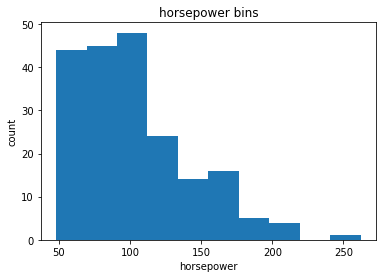

In [23]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Nos gustaría tener 3 bins de igual tamaño así que usamos la funcion linspace(start_value, end_value, numbers_generated function) de Numpy

Ya que queremos incluir el valor minimo de horsepower, queremos fijar start_value = min(df["horsepower"])

Ya que queremos incluir el valor maximo de horsepower, queremos fijar end_value = max(df["horsepower"])

Ya que queremos construir 3 bins de igual longitud, deben haber 4 divisores, asi que numbers_generated = 4

Contruimos un arreglo bin, con un valor minimo a un maximo, con ancho de banda calculado arriba. Los bins serán valores usados para determinar cuando uno de los bins terminan y otro empieza.


In [24]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Ponemos nombre a los grupos:

In [25]:
group_names = ['Low', 'Medium', 'High']

 Aplicamos la funcion "cut" para determinar a que valores pertenecen a cada bin:

In [26]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Veamos el numero de vehiculos en cada bin:

In [27]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Graficamos la distribucion de cada bin:

Text(0.5, 1.0, 'horsepower bins')

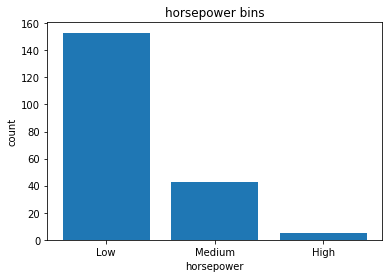

In [28]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Vizualizacion de bines

Text(0.5, 1.0, 'horsepower bins')

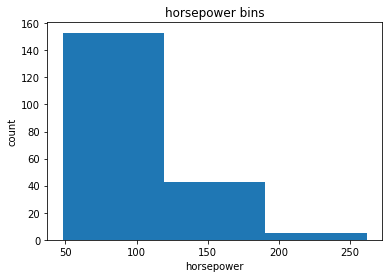

In [29]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h2>Indicator variable (o dummy variable)</h2>
<b>Qué es una indicator variable?</b>
<p>
    Una indicator variable (o dummy variable) es una variable numerica usada para etiquertar categorías. Son llamadas "dummies" por que los numeros en si no tienen significado inherente. 
</p>

<b>Por qué usamos indicator variables?</b>

<p>
    Se usan de manera de que podamos usar variables categoricas para un analisis de regresion en los siguientes modulos.
</p>

<b>Ejemplo</b>
<p>
    Vemos que en la columna "fuel-type" tiene dos unicos valores, "gas" o "diesel". La regresion no entiende palabras, solo numeros. Para usar este atributo en un analisis de regresion, convertimos "fuel-type" a variable indicadora.
</p>

<p>
<!--   Usaremos el metodo ".get_dummies" de Pandas para asignar valores numericos a las diferentes categorias de tipo de combustible.</p> -->

In [30]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Obtenemos las indicator variables y les asignamos "dummy_variable_1" al dataframe.

In [31]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Cambiamos el nombre de las columnas por claridad

In [32]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Agregamos estas columnas a nuestro dataframe y eliminamos la columna "fuel-type": 

In [33]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,0,1


Las ultimas dos columnas son ahora las variables indicadoras que representan la variable del tipo de combustible. Los valores son 0 y 1 ahora.

Ahora creamos otra variable indicadora sobre la columna "aspiration" donde "std" equivale a 0 mientras "turbo" a 1. Tambien eliminamos esta columna.

In [34]:
# Write your code below and press Shift+Enter to execute 
dummy_variable_2 = pd.get_dummies(df["aspiration"])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# merge data frame "df" and "dummy_variable_2" 
df = pd.concat([df, dummy_variable_2], axis=1)


In [35]:
# Eliminamos la columna
df.drop("aspiration", axis = 1, inplace = True)

df.head(3)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0


Finalmente guardamos el nuevo dataframe:

In [36]:
df.to_csv('clean_df.csv')

---
# Analisis exploratorio de datos

## Objetivos: 

-   Explorar caracteristicas para predecir el precio del carro.

Usaremos el siguiente dataframe:

In [37]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3> Analizando patrones en caracteristicas individuales usando vizualizacion</h3>


Importamos los paquetes de vizualizacion "Matplotlib" y "Seaborn", sin olvidar "%matplotlib inline" para poder graficar en Jupyter notebook.

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>Cómo escoger un metodo de vizualizacion correcto?</h4>
<p>Cuando hacemos una vizualizacion e variables individuales, es importante primero entender de que tipo de variable se trata. Esto nos ayudará a encontrar el método de visualización correcto para esa variable.</p>

In [39]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


por ejemplo, podemos calcular la correlacion entre variables de tipo "int64" o "float64" usuando el metodo ".corr()":

In [40]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


La **correlación** es una medida estística para medir qué tanto diferentes variables son interdependientes.

Veamos, por ejemplo, la correlacion que existe entre las siguientes variables: 'bore', 'stroke', 'compression-ratio', 'horsepower'

In [41]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Variables numéricas continuas</h2> 

<p>Variables numéricas continuas son variables que pueden contener cualquier valor dentro de un rango. Pueden ser de tipo "int64" o "float64". Una buena manera de vizualizar estas variables es usando graficas de dispersion con lineas ajustadas. Esto para entender las relaciones (lineales) entre una variable en especifico y el precio.</p>

<p>Podemos hacer esto usando "regplot", el cual grafica una dispersion de puntos y hace un ajuste a una linea de regresion para los datos.</p>

<p> Veamos varios ejemplos de relaciones lineales</p>

<h4>Relacion lineal positiva</h4>

Encontremos la grafica de dispersion de "engine-size" y "price". 

(0.0, 53245.688470126894)

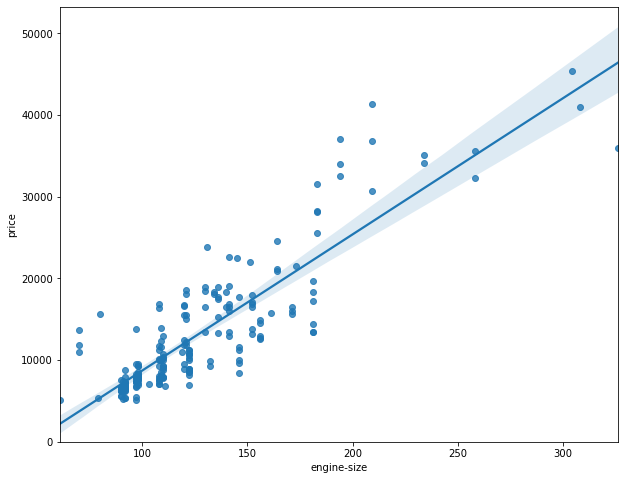

In [42]:
# Engine size as potential predictor variable of price
#escogemos el tamaño:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
#graficamos:
sns.regplot(x="engine-size", y="price", data=df, ax=ax)
plt.ylim(0,)

<p>El tamaño del motor incrementa, el precio aumenta: esto indica una correlación positiva directa entre estas dos variables. El tamaño del motor parece un buen indicador  para predecir el precio ya que la regresion lineal es casi una diagonal perfecta.</p>

Podemos examinar la correlacion entre "engine-size" y "price" y ver que es aproximadamente 0.87


In [43]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<h4>Relacion lineal negativa</h4>

Highway mpg es una potencial variable para predecir price

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

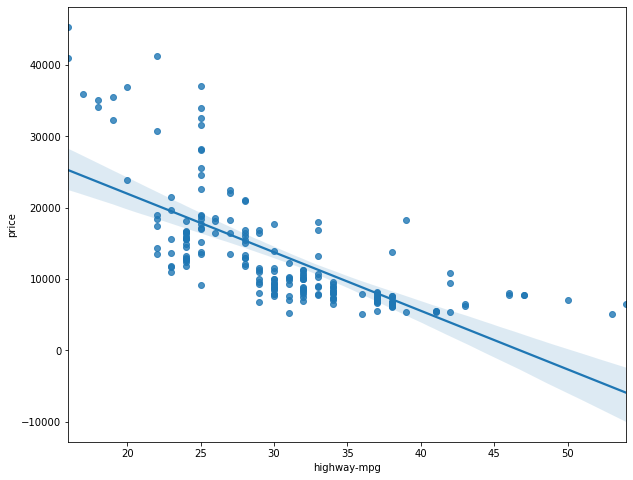

In [44]:
#escogemos el tamaño:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.regplot(x="highway-mpg", y="price", data=df)

<p>Como highway-mpg incrementa, el price decrece: esto indica una relacion inverso/negativo entre estas dos variables, por lo que highway mpg podría predecir el precio.</p>

Podemos examinar la correlacion entre 'highway-mpg' y 'price' y ver que es aproximadamente -0.704

In [45]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h4>Relacion lineal debil</h4>

Veamos si "peak-rpm" como variable predictora de "price".

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

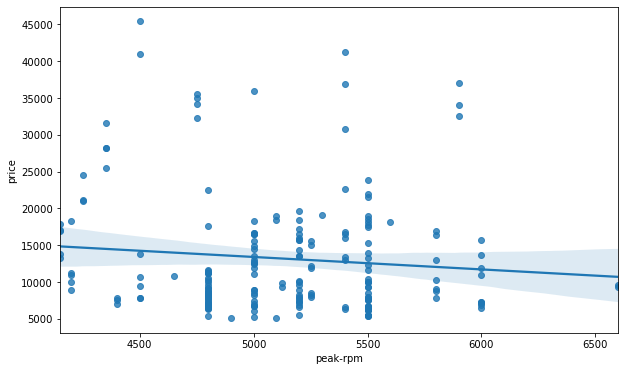

In [46]:
#escogemos el tamaño:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm no parece ser buena variable para predecir el precio, ya que la linea de regresion está cerca a una linea horizontal. Además, todos los puntos están muy dispersos y lejos de la linea de ajuste, mostrando mucha variabilidad. Por lo que no es una variable confiable.</p>

Podemos examinar la correlacion entre "peak-rpm" y "price" y ver que es aproximadamente -0.101616 

In [47]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h3>Variables categóricas</h3>

<p>Estas son variables que describen una "caracteristica" de una unidad de datos, y son seleccionadas de un pequeño grupo de categorias. Estas variables pueden ser de tipo "object" o "int64". Una buena manera de visualizar estas variables es usando boxplots.</p>

Veamos la relacion entre "body-style" y "price"

<AxesSubplot:xlabel='body-style', ylabel='price'>

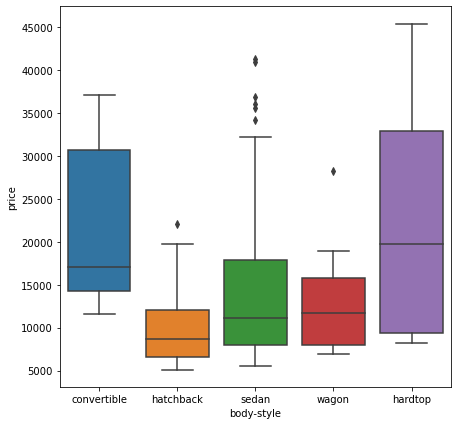

In [48]:
#escogemos el tamaño:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

sns.boxplot(x="body-style", y="price", data=df)

<p>Vemos que las distribuciones de precio entre los diferentes categorias de body-style tienen un traslape significativo, por lo que body-style no será buen predictor del precio. Examinemos "engine-location" y "price":</p>

<AxesSubplot:xlabel='engine-location', ylabel='price'>

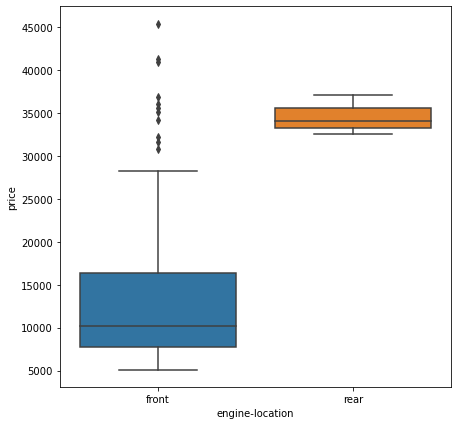

In [49]:
#escogemos el tamaño:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

sns.boxplot(x="engine-location", y="price", data=df)

<p>Aqui vemos que la distribucion de precio entre esas dos categorias de lugares del motor, front y rear (frontal y trasera), son suficientemente distintas para tomar la variable engine-location como un buen predictor de precio.</p>

Examinemos qué pasa entre "drive-wheels" y "price".

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

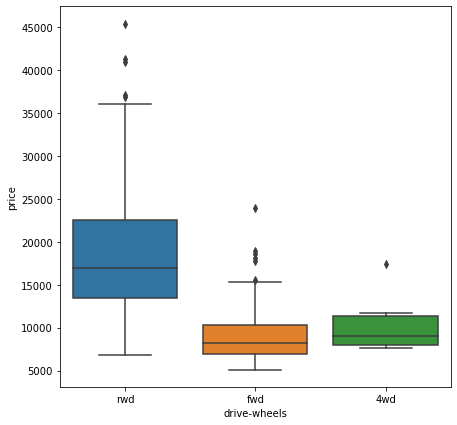

In [50]:
#escogemos el tamaño:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Aquí vemos que la distribución de precio entre los diferentes tipos de llantas difieren; de manera que "drive-wheels" podria ser buena predictora del precio.</p>


<h2>Análisis estadístico descriptivo </h2>

<p>El método <b>describe()</b> calcula automaticamente estadisitca basica para todas las variables continuas. Cualquier NaN es ignorado en estas estadísticas.</p>



In [51]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


La configuración por default de "describe" ignora variables de tipo objeto. Podemos incluir el argumento include para que tome en cuenta el tipo "object":

In [52]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Conteo de valores</h3>

<p>Conteo de valores es buena manera de entender cuantas unidades de cada caracteristica/variable tenemos. Podemos aplicar el método "value_counts" en la columna "drive-wheels". No hay que olvidar que este método solo funciona en Pandas Series, no en DataFrames. Como resultado, podemos incluir un bracket "df[["drive-wheels"]]".</p>


In [53]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos convertir series a dataframes como sigue:

In [54]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Repitamos los pasos de arriba pero guardemos los resultados al dataframe "drive_wheels_counts" y renombramos la columna "drive-wheels" a "value_counts".

In [55]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Ahora renombramos el nombre del indice a "drive-wheels": 

In [56]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir el proceso anterior para la variable "enigne-location":

In [57]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>Examinando los valores contados, la localizacion del motor no es buena variable para predecir el precio ya que sólo tenemos datos de 3 carros con motor en la parte trasera, comparado con 198 carros que tienen motor en la parte delantera.</p>


<h2>Basicos sobre Agrupar (Groupby)</h2>

<p>El metodo "groupby" agrupa los datos por diferentes categorias. Los datos pueden ser agrupados basados en una o varias variables y el analisis puede ser realizado en los grupos individuales.</p>

<p>Por ejemplo, agrupemos por la variable "drive-wheels". Vemos que hay 3 categorias diferentes de drive wheels.</p>


In [58]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Si queremos saber, en promedio, qué tipo de drive wheel es mas valorado, podemos agrupar "drive-wheels" y luego promediarlo.</p>

<p>Podemos seleccionar las columnas "drive-wheels", "body-style" y "price", luego asignarle la variable "df_group_one".</p>

In [59]:
df_group_one = df[['drive-wheels','body-style','price']]



Luego podemos calcular el promedio del precio para cada una de las diferentes categorias de datos.


In [60]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>De nuestros datos, se observa que vehiculos rear-wheel son, en promedio, los más caros, mienstras que los 4-wheel y front-wheel aproximadamente del mismo precio.</p>

<p>Podemos agrupar tambien multriples variables. Por ejemplo, agrupemos por "drive-wheels" y "body-style". Esto agrupa el dataframe por las unicas combinaciones 'drive-wheels' y 'body-style'. Luego guardamos los resultados en la variable "grouped_test1".</p>


In [61]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Estos datos agrupados son mas faciles de vizualizar cuando estan hechos en tabla pivote. Una tabla pivote es como una hoja de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el dataframe a una tabla pivote usando el metodo "pivot" para crear una tabla pivote desde una agrupada.</p>

<p> En este caso, dejaremos la variable drive-wheel como las filas de la tabla, y como pivote body-style que sean las columnas de la tabla:</p>


In [62]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Podemos llenar las celdas vacias NaN con el valor 0 aunque cualquier otro podria ser usado:</p>

In [63]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Si queremos encontrar el precio promedio de los carros por su bodystyle usamos el procedimiento anterior:

In [64]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<h4>Variables: Drive Wheels y Body Style vs Price</h4>

Usemos un mapa de calor para vizualizar la relacion entre Body-Style vs Precio:

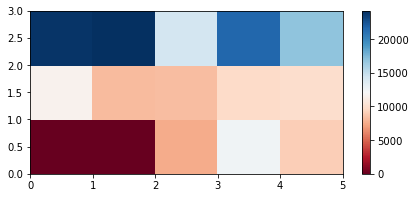

In [65]:
#escogemos el tamaño:
fig, ax = plt.subplots()
fig.set_size_inches(7, 3)

#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>El mapa de calor grafica la variable target (price) proporcional al color con respecto a las variables "drive-wheel" y "body-style" en los ejes vertical y horizontal respectivamente. Esto nos permite vizualizar como los precios estan relacionados a las variables 'drive-wheel' y 'body-style'.</p>

<p>Las etiquetas predeterminadas no nos transmiten información útil. Vamos a cambiar eso:</p>

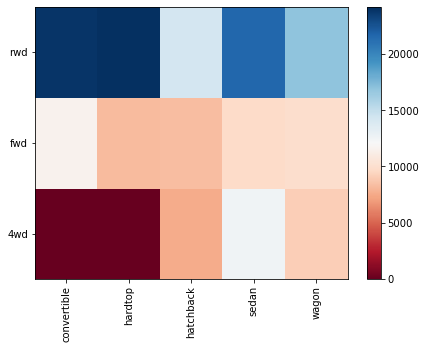

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2>Correlacion y causalidad</h2>

<p><b>Correlacion</b>: Una medida de la interdependecia entre variables.</p>

<p><b>Causalidad</b>: La relacion entre causa y efecto entre dos variables.</p>

<p>Es importante saber la diferencia entre estos dos conceptos y que la correlacion no implica causalidad. Determinar la correlacion es mucho mas simple que determinar la causalidad como causalidad puede requerir de experimentacion independiente.</p>

<p3><b>Correlacion de Pearson</b></p3>

<p>La Correlacion de Pearson mido la dependencia linear entre dos variables X y Y.</p>
<p>El coeficiente resultante es un valor entre -1 y 1 inclusivo, donde:</p>
<ul>
    <li><b>1</b>: Correlacion lineal positiva total.</li>
    <li><b>0</b>: No hay correlacion lineal, las dos variables no se afectan entre si.</li>
    <li><b>-1</b>: Correlacion lineal negativa total.</li>
</ul>



<p>La correlacion Pearson es el metodo predeterminado de la funcion "corr()". Como antes, podemos calcular la correlacion Pearson de variables "int64" o "float64".</p>


In [67]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<b>Valor P</b>: 

<p>Qué es el valor P? El valor P es la probabilidad de que la correlacion entre dos variables sea estadisticamente significativa. Normalmente, escogemos un nivel significativo de 0.05, lo cual significa que estamos 95% seguros de que la relacion entre las variables es significativa.</p>

Por convencion, cuando

<ul>
    <li>valor P es $<$ 0.001: decimos que hay una fuerte evidencia que la relacion sea significativa.</li>
    <li>el valor P es $<$ 0.05: hay evidencia moderada de que la correlacion sea significativa.</li>
    <li>el valor P es $<$ 0.1: hay evidencia debil de que la correlacion sea significativa.</li>
    <li>el valor p es $>$ 0.1: No hay evidencia debil de que la correlacion sea significativa.</li>
</ul>


Podemos obtener esta informacion usando el modulo "stats" de la libreria "scipy".


In [68]:
from scipy import stats

<h3>Wheel-base vs Price</h3>

Calculemos el coeficiente de correlacion Pearson y el valor P de "wheel-base" y "price".


In [69]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


<h5>Conclusion:</h5>
<p>Ya que el valor P es $<$ 0.001, la correlacion entre wheel-base y price es estadisticamente significativa, the correlation between wheel-base and price is statistically significant, aunque la relacion lineal no es muy fuerte (~0.585)</p>


<h3>Horsepower vs Price</h3>

Calculemos el coeficiente de correlacion Pearson y el valor P de "horsepower" y "price".

In [70]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036555  with a P-value of P =  6.369057428261186e-48


<h5>Conclusion:</h5>

<p>El valor P es $<$ 0.001, por lo que la correlacion entre horsepower y price es estadisticamente significativa, y la relacion lineal es algo fuerte (~0.809, cerca de 1)</p>


<h3>Length vs Price</h3>

Calculemos el coeficiente de correlacion Pearson y el valor P de "length" y "price".


In [71]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483643  with a P-value of P =  8.01647746615853e-30


<h5>Conclusion:</h5>
<p>El valor P es $<$ 0.001, la correlacion entre length y price es estadisticamente significativa, y la relacion lineal es moderadamente fuerte (~0.691).</p>


<h3>Width vs Price</h3>

Calculemos el coeficiente de correlacion Pearson y el valor P de "width" y "price".

In [72]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522665  with a P-value of P = 9.200335510484131e-38


##### Conclusion:

El valor de P es &lt; 0.001, la correlacion entre width y price es estadisticamente significativa, y la relacion lineal es fuerte (~0.751).

<h2>ANOVA</h2>

<h3>ANOVA: Analisis de Varianza</h3>
<p>El analisis de varianza (ANOVA) es un metodo estadistico usado para poner a prueba si hay diferencias significativas entre los promedios de 2 o más grupos. ANOVA regresa dos parametros:</p>

<p><b>Puntuacion de la prueba F</b>: ANOVA asume que el promedio de todos los grupos es el mismo, calcula cuanto se devia el promedio actual de la suposicion, y lo reporta con una puntuacion de prueba F. Una puntuacion grande significa que hay una gran diferencia entre los promedios.</p>

<p><b>Valor P</b>: El valor P dice que tan significativo es nuestro valor de puntuacion.</p>

<p>Si nuestra variable precio esta fuertemente correlacionada con la variable que estamos analizando, esperamos que ANOVA nos regrese una puntuacion considerable de la prueba F y un valor pequeño del valor P.</p>

<h3>Drive Wheels</h3>

<p>Ya que ANOVA analiza la diferencia entre diferentes grupos de la misma variable, la funcion groupby nos será de utilidad. Debido a que el algoritmo ANOVA promedia los datos automaticamente, no necesitamos tomar el prmedio de antemano.</p>

<p>Veamos si diferentes tipos de "drive-wheels" impactan en "price", agrupamos los datos.</p>



In [73]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [74]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


Podemos obtener los valores del metodo grupo usando el metodo "get_group".


In [75]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

podemos usar la funcion "f_oneway" en el modulo "stats" para obtener la **puntuacion de prueba F** y el **valor P**</b>.


In [76]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Este es un buen resultado, con una puntuacion grande mostrando una fuerte correlacion y un valor P de casi 0 implicando que hay cierto significado estadistico. Pero esto significa que los tres grupos en prueba estan todos altamente correlacionados?.


#### Separately: fwd and rwd


In [77]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


 Examinemos los otros grupos.

#### 4wd and rwd


In [78]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [79]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


# Desarrollo de modelos

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#cargamos datos
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3> Regresion lineal simple y multiple</h3>
<br>
<p> Regresion Lineal Simple es un metodo que nos ayuda a entender la relacion entre dos variables:</p>
<ul>
    <li>La variable predictora/independiente (X)</li>
    <li>La variable respuesta/dependiente (que queremos predecir)(Y)</li>
</ul>

<p>El resultado de una regresion lineal es una <b>funcion lineal</b> que predice la variable respuesta (dependiente) como funcion de la variable predictora (independiente).</p>

$$
 Y: Respuesta \ Variable\\
 X: Predictoras \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a se refiere a la <b>interseccion</b> de la linea de regresion, en otras palabras: el valor de Y cuando X es 0 es 0</li>
    <li>b se refiere a la <b>pendiente</b> de la linea de regresion, en otras palabras: el valor con el cual Y cambia cuando x incrementa por 1 unidad</li>
</ul>

<h4> Cargamos los modulos para regresion lineal</h4>


In [81]:
from sklearn.linear_model import LinearRegression

<h4>Creamos el objeto de regresion lineal</h4>

In [82]:
lm = LinearRegression()
lm

LinearRegression()

<h4>Como nos ayuda Highway-mpg a predecir el precio del carro?</h4>

Definimos las variables predictora y respuesta:

In [83]:
X = df[['highway-mpg']]
Y = df['price']

Ajustamos el modelo lineal usando highway-mpg.


In [84]:
lm.fit(X,Y)

LinearRegression()

Obtenemos una prediccion de salida:

In [85]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Cual es el valor de la interseccion (a)?</h4>


In [86]:
lm.intercept_

38423.305858157415

<h4>Cual es el valor de la pendiente (b)?</h4>


In [87]:
lm.coef_

array([-821.73337832])

<h3>Cual es el modelo lineal estimado que obtenemos?</h3>

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


### Regresión lineal múltiple

<p>Qué pasa si queremos predecir el precio del carro con varias variables?</p>

<p>Si queremos usar más variables en nuestro modelo para predecir el precio del carro podemos usar <b>Regresion Lineal Multiple</b>.
Este metodo es usado para explicar la relacion entre una variable de respuesta continua (dependiente) y <b>dos o más</b> variables predictoras (independientes).</p>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Usaremos las siguientes variables predictoras:

In [88]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


In [89]:
# ajustamos el modelo:
lm.fit(Z, df['price'])

LinearRegression()

Cual es el valor de la interseccion (a)?

In [90]:
lm.intercept_

-15806.624626329234

What are the values of the coefficients (b1, b2, b3, b4)?

In [91]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

 Cual es el modelo lineal estimado que obtenemos?

Deberiamos obtener la funcion linear con la estructura:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

Cual es la funcion lineal que obtenemos en este ejemplo?

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


### Evaluacion de modelo usando Vizualizacion

Importamos el paquete de vizualizacion Seaborn:

In [92]:
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

<p>Este plot nos mostrara una combinacion de puntos de datos dispersos, al igual que el ajuste a una <b>regresion lineal</b> linea que pasa a traves de los datos. Esto nos dará un estimado razonable de la relcacion entre dos variables, la fuerza de la correlacion, al igual que su direccion (correlacion positiva o negativa).</p>

Vizualicemos la variable **highway-mpg** como potencial predictora del precio:


(0.0, 48175.993679626656)

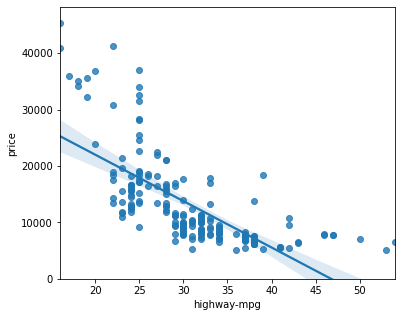

In [93]:
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>Podemos ver de este plot que el precio esta negativamente correlacionado con highway-mpg, ya que la pendiente de la regresion es negativa.
Si los datos estan muy alejados de la linea, quizas este modelo lineal no es buen modelo para estos datos.</p>

Comparemos con la variable "peak-rpm":

(0.0, 47414.1)

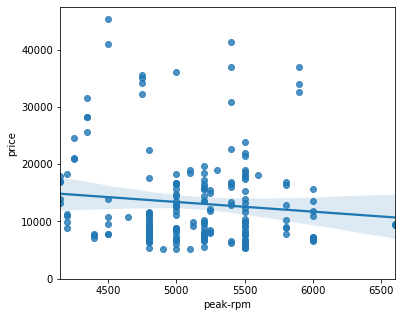

In [94]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparando el plot de regresion de "peak-rpm" y "highway-mpg" podemos ver que puntos de "highway-mpg" estan mas cercanos a la linea generada y en promedio decrece. Los puntos de "peak-rpm" se esparcen mas alrededor de la linea predictiva, y es mas dificil determinar si los puntos incrementan o decrecen como "highway-mpg" incrementa.</p>


In [95]:
df[["highway-mpg", "peak-rpm","price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


Por lo que la variable "highway-mpg" tiene una correlacion más fuerte con "price" comparada con la variable "peak-rpm".

<h3>Plot de Residuos</h3>

<p>Una buena manera de vizualizar la varianza de los datos es usando un plot de residuos.</p>

<p>Qué es un <b>residuo</b>?</p>

<p>La diferencia entre el valor observado (y) y el valor predecido (Yhat) es llamado residuo (e). Cuando miramos un plot de residuos, el residuo es la distancia de un punto al ajuste de regresion lineal.</p>

<p>Asi que, qué es un <b>plot residual</b>?</p>

<p>Un plot de residuos es una grafica que muestra los residuos en el eje vertical "y" y la variable independiente en el eje horizontal "x".</p>

<p>Si los puntos en el plot residual estan <b>aleatoriamente dispersos alrededor del eje x</b>, entonces el <b>modelo lineal es apropiado</b> para los datos. Por qué es eso? Dispersion aleatoria de los residuos significa que la varianza es contante, y entonces el modelo lineal es un buen ajuste para estos datos.</p>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


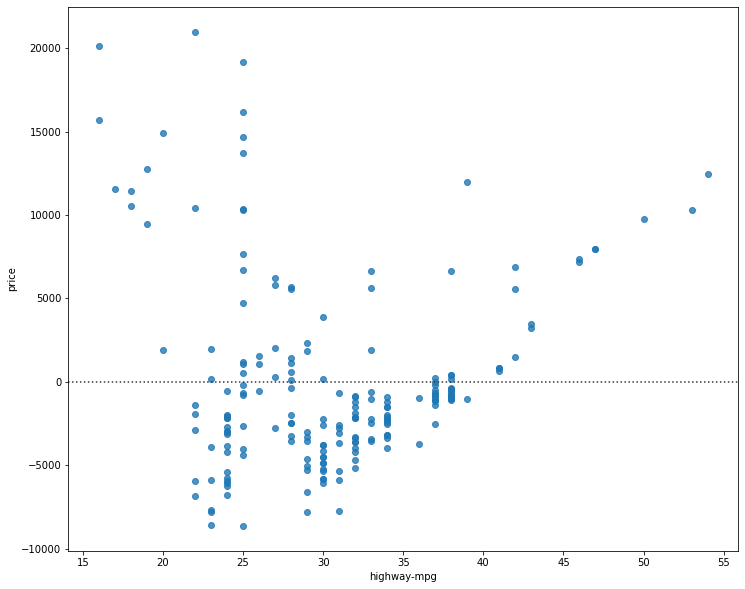

In [96]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<i>Que nos dice este plot?</i>

<p>Podemos ver que los puntos residuales no estan aleatoriamente dispersos alrededor del eje x, lo cual nos lleva a creer que quizas un modelo no lineal es mas apropiado para estos datos.</p>


<h2> Plot de Distribución</h2>
<h3>Regresion lineal multiple</h3>

<p>Como vizualizamos un modelo para regresion lineal multiple? Esto se pone más complicado por quen no podemos vizualizar con una regresion o un plot de residuos.</p>

<p>Una manera de mirar el ajuste modelo es con un <b>plot de distribucion</b>: Podemos mirar una distribucion de los valores ajustados que resultan del modelo y compararlo con la distribucion de los valores reales.</p>

In [97]:
#Hagamos una prediccion:
Y_hat = lm.predict(Z)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


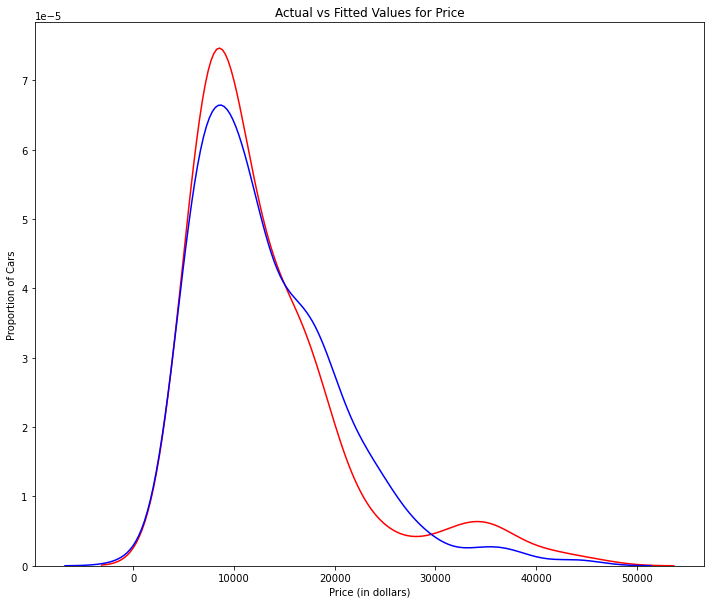

In [98]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>Podemos ver que los valores ajustados estan razonablemente cerca de los valores reales, ya que las dos distribuciones se sobreponen un poco. Sin embargo, aun se puede mejorar.</p>

<h2>Regresion Polinomial y Pipelines</h2>

<p><b>Regresion polinomial</b> es un caso particular del modelo de la regresion lineal general o del modelo de regresion lineal multiple.</p> 
<p>Obtenemos relaciones no lineales al elevar al cuadrado o agregando terminos de orden mayor de las variables predictoras.</p>

<p>Hay diferentes ordenes de regresion polinomial:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

<p>Vimos anteriormente que un modelo lineal no da un buen ajuste mientras se usa la variable highway-mpg como variable predictora. Veamos si podemos ajustar un modelo polinomial a los datos.</p>

<p>Vamos a usar la siguiente funcion para plotear los datos:</p>


In [99]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Definimos las variables

In [100]:
x = df['highway-mpg']
y = df['price']

Ajustemos el polinomio usando la funcion <b>polyfit</b>, luego usamos la funcion <b>poly1d</b> para mostrar la funcion polinomial.

In [101]:
# Aqui usamos un polinomio de 3er orden(cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Grafiquemos la funcion:

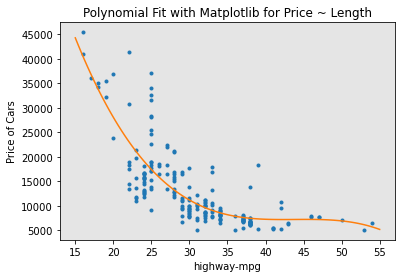

In [102]:
PlotPolly(p, x, y, 'highway-mpg')

In [103]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>Podemos ver del plot que este modelo polinomial realiza un mejor ajuste que el modelo lineal. Esto es debido a que la funcion polinomial "golpea" más puntos de los datos.</p>

<p>La expresion analitica para una funcion Polinomio Multivariable se complica. Por ejemplo, la expresion para un polinomio de 2o orden (grado=2) con dos variables esta dado por:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

Podemos realizar una transformacion polinomica en multiples variables. Primero importamos el modulo:

In [104]:
from sklearn.preprocessing import PolynomialFeatures

Creamos un objeto <b>PolynomialFeatures</b> de grado 2: 

In [105]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [106]:
Z_pr=pr.fit_transform(Z)

Los datos originales tienen 201 muestras y 4 caracteristicas

In [107]:
Z.shape

(201, 4)

Despues de la transformacion, hay 201 muestras y 15 caracteristicas.

In [108]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>

<p>Pipelines de datos simplifican los pasos del procesamiento de datos. Usamos el modulo <b>Pipeline</b> para crear un pipeline. Tambien usamos <b>StandardScaler</b> como un paso de nuestro pipeline.</p>


In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Construimos el pipeline, crando una lista de tuplas incluyendo el nombre del modelo o estimador y su contructor correspondiente.


In [110]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Metemos la lista como un argumento del constructor del pipeline.

In [111]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Podemos normalizar los datos, realizar una transformada y ajustar el modelo simultaneamente. 


In [112]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarmente, podemos normalizar los datos, realizar una transformacion y producir una prediccion simultaneamente


In [113]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<h2>Medidas para la evaluación en la muestra</h2>

<p>Cuando evaluamos nuestros modelos, no solo queremos visualizar los resultados, tambien queremos medir cuantitativamente que tan preciso es nuestro modelo.</p>

<p>Dos importantes mediciones que son usualmente usadas en Estadistica para determinar la precision de un modelo son:</p>
<ul>
    <li><b>R^2 / R-cuadrado</b></li>
    <li><b>Error cuadrático medio ECM ( en ingles MSE)</b></li>
</ul>
    
<b>R-cuadrado</b>

<p>R cuadrado, tambien conocido como coeficiente de determinacion, es una medida que indica que tan cerca estan los datos a la linea de regression.</p>
    
<p>El valor de R-cuadrado es el porcentaje de varacion de la variable de respuesta (y) que es explicada en el modelo lineal.</p>

<b>Error cuadrático medio (MSE)</b>

<p>El Error cuadrático medio mide el promedio de los errores al cuadrado, esto es, la diferencia entre el valor actual (y) y el valor estimado (ŷ).</p>

<h3>Modelo 1: Regresion Lineal Simple</h3>

Calculemos R^2


In [114]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Podemos decir que ~ 49.659%  de la variacion del precio es explicada por este modelo lineal simple "horsepower_fit".

Calculemos el MSE

Podemos predecir la salida, i.e., "yhat" usando el metodo predict, donde X es la variable de entrada:



In [115]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Importamos la funcion <b>mean_squared_error</b> del modulo <b>metrics</b>


In [116]:
from sklearn.metrics import mean_squared_error

Comparamos el resultado predicho con el resultado real.

In [117]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Modelo 2: Regresion Lineal Multiple</h3>

Calculemos R^2


In [118]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Podemos decir que ~ 80.896 % de la variacion del precio es explicada por este ajuste a regresion multiple lineal "multi_fit".

Calculemos el MSE

producimos una prediccion



In [119]:
Y_predict_multifit = lm.predict(Z)

Comparamos los resultados predichos con los resultados reales 

In [120]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Modelo 3: Ajuste Polinomial</h3>

Calculemos R^2

Importamos la funcion <b>r2_score</b> del modulo <b>metrics</b> ya que usamos una funcion diferente


In [121]:
from sklearn.metrics import r2_score

Aplicamos la funcion para obtener el valor de r^2


In [122]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


Podemos decir que el ~ 67.419 %  de la variazion del precio es explicada por este ajuste polinomial.


<h3>MSE</h3>

Calculamos el MSE:


In [123]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>Prediccion y toma de decisiones</h2>

<h3>Prediccion</h3>

<p>En la seccion anterior, entrenamos el modelo usando el metodo <b>fit</b>. Ahora vamos a usar el metodo <b>predict</b> para producir una prediccion. Importamos <b>pyplot</b> para plotear; tambien usaremos algunas funciones de numpy.</p>


In [124]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Creamos una nueva entrada

In [125]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Entrenamos el modelo:

In [126]:
lm.fit(X, Y)
lm

LinearRegression()

Producimos una prediccion:

In [127]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Ploteamos los datos:

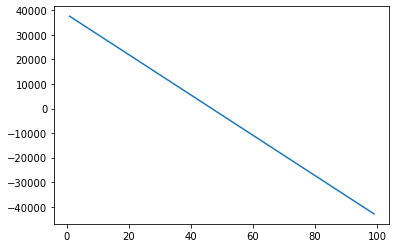

In [128]:
plt.plot(new_input, yhat)
plt.show()

<h3>Toma de decisiones: Determinando un buen ajuste del modelo</h3>

<p>Ahora que hemos visualizado diferentes modelos, y generado R-squared y los valores MSE para los ajustes, como determinamos un buen ajuste del modelo?
<ul>
    <li><i>Que es un buen valor de R-squared?</i></li>
</ul>
</p>

<p>Cuando comparamos modelos, <b>el modelo con mayor R-squared es un mejor ajuste</b> para los datos.
<ul>
    <li><i>Que es un buen MSE?</i></li>
</ul>
</p>

<p>Cuando comparamos modelos, <b>el modelo con el MSE más pequeño es un mejor ajuste </b> para los datos.</p>

<h4>Veamos los valores para los diferentes modelos.</h4>
<p>Regresion Lineal Simple: Usando Highway-mpg como una variable de prediccion de Price.
<ul>
    <li>R-cuadrada: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Rregresion Lineal Multiple: Usando Horsepower, Curb-weight, Engine-size, y Highway-mpg como variables de prediccion de Price.
<ul>
    <li>R-cuadrada: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Ajuste Polynomial: Usando Highway-mpg como variable de prediccion de Price.
<ul>
    <li>R-cuadrada: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Modelo Regresion Lineal Simple (SLR) vs Modelo Regresion Lineal Multiple (MLR)</h3>

<p>Usualmente, entre mayor numero de variables, mejor es el modelo para predecir, pero esto no siempre es verdad. A veces no se tienen suficientes datos, por lo que hay errores numericos, o muchas de las variables no son utiles o incluso actuan como ruido. Como resultado, se debe checar siempre el MSE y R^2.</p>

<p>Así que para hacer posible una comparacion de los modelos MLR vs SLR, miramos una combinacion de ambos el R-cuadrado y MSE para realizar la mejor conclusion sobre el ajuste del modelo.
<ul>
    <li><b>MSE</b>El MSE de SLR es  3.16x10^7  mientras que para MLR tiene un MSE de 1.2 x10^7. El MSE de MLR es mucho más pequeño.</li>
    <li><b>R-cuadrada</b>: En este caso, podemos tambien ver que hay una gran diferencia entre el R-cuadrado de SLR y el R-cuadrado del MLR. El R-cuadrado para el SLR (~0.497) es muy pequeño comparado con el R-cuadrado del MLR (~0.809).</li>
</ul>
</p>

Esta R-cuadrado en combinacion con el MSE muestra que MLR parece un mejor ajuste de modelo en este caso, comparado con SLR.

<h3>Regresion Lineal Simple (SLR) vs Ajuste Polinomial</h3>

<ul>
    <li><b>MSE</b>: Podemos ver que el ajuste Polinomial disminuyó el MSE, ya que este MSE es más pequeño que el de SLR.</li> 
    <li><b>R-cuadrado</b>: El R-cuadrado para el Polyfit es más grande que el R-cuadrado del SLR, asi que el ajuste Polinomial tambien aumentó el R-cuadrado un poco.</li>
</ul>
<p>Ya que el ajuste Polinomial resulto en un menor MSE  y mayor R-squared, podemos concluir que este fue un mejor ajuste de modelo que el SLR para predecir el Price con Highway-mpg como una variable predictora.</p>

<h3>Regresion Lineal Multiple (MLR) vs Ajuste Polinomial</h3>

<ul>
    <li><b>MSE</b>: El MSE para el MLR es más pequeño que el MSE del ajuste Polinomial.</li>
    <li><b>R-cuadrada</b>: La R-cuadrado para el MLR es tambien mucho mayor que el ajuste Polinomial.</li>
</ul>




### Conclusion:
<p>Comparando estos tres modelos, concluimos que <b>el modelo MLR es el mejor modelo</b> para predecir el precio de nuestros datos. Este resultado tiene sentido, ya que tenemos 27 variables en total, y sabemos que más de una de esas variables es potencialmente predictora del precio final del carro.</p>


## Evaluacion de modelo y Refinamiento

In [129]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

df.to_csv('module_5_auto.csv')

Primero usemos solo datos numericos:

In [130]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Librerias para plotear:

In [131]:
#%%capture
#! pip install ipywidgets

In [132]:
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Funciones para plotear</h2>


In [133]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [134]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">1- Entrenamiento y pruebas</h2>

<p>Un paso importante en poner a prueba el modelo es separando los datos en datos de entrenamiento y datos de prueba. Colocaremos los datos de objetivo <b>price</b> en un dataframe por separado <b>y</b>:</p>


In [135]:
y_data = df['price']

quitamos la columna price en los datos x:


In [136]:
x_data=df.drop('price',axis=1)

Ahora separamos aleatoriamente nuestros datos en entrenamiento y prueba usando la funcion <b>train_test_split</b>. 


In [137]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of training samples:",x_train.shape[0])
print("number of test samples :", x_test.shape[0])



number of training samples: 180
number of test samples : 21


El parametro <b>test_size</b> configura la proporcion de datos que seran separado al conjunto de prueba. En este caso, el conjunto de prueba se coloco en un 10% del total. 

Importemos <b>LinearRegression</b> del modulo <b>linear_model</b>.


In [138]:
from sklearn.linear_model import LinearRegression

Creamos un objeto de Regresion Lineal:


In [139]:
lre=LinearRegression()

Entrenamos el modelo usando la caracteristica horsepower 


In [140]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculamos R^2 en los datos test:


In [141]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

Podemos ver que R^2 es mucho menor usando los datos test.


In [142]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

A veces no hay suficientes datos para test; como resultado, quizas quieras realizar un Cross-validation (Validacion Cruzada). Veamos diferentes metodos que se pueden usar para Cross-validation. 


<h2> Puntuacion de Cross-validation</h2>

Importemos <b>model_selection</b> del modulo <b>cross_val_score</b>.


In [143]:
from sklearn.model_selection import cross_val_score

Insertamos el objeto, la variable ' horsepower', los datos target (y_data). El parametro 'cv' determina el numero de capas; en este caso 4. 


In [144]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

La puntuacion por default es R^2; cada elemento en el arreglo tiene el promedio R^2 en la capa:


In [145]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

Podemos calcular el promedio y la desviacion estandar de nuestra estimacion:


In [146]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


Podemos usar el promedio cuadrado negativo como puntuacion configurando el parametro metrico 'scoring' a 'neg_mean_squared_error'. 


In [147]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014932,
       17561927.72247591])

Puedes usar tambien la funcion 'cross_val_predict' para predecir la salida. La funcion separa los datos en un numero especifico de capas, usando una capa como prueba y las otras capas son usadas para entrenamiento. Primero importamos la funcion:


In [148]:
from sklearn.model_selection import cross_val_predict

Ingresamos el objeto, la variable en este caso <b>'horsepower'</b> , los datos <b>y_data</b>. El parametro 'cv' determina el numero de capas; en este caso 4. Producimos la salida:


In [149]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2"> Overfitting, Underfitting y Seleccion de Modelo</h1>

<p>Resulta que los datos de prueba (test) aveces referidos como la salida de los datos de muestra es mucha mejor medida de qué tan bueno es el modelo para el mundo real. Una razon de esto es el overfitting; Veamos algunos ejemplos. Resulta que estas diferencias son mas aparentes en Regresion Lineal Multiple y Regresion Polinomial así que vamos a explorar el overfitting en ese contexto.</p>

Let's create Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.



In [150]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediccion usando los datos training:

In [151]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

Prediccion usando los datos test: 


In [152]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Realicemos una evaluacion del modelo usando nuestros datos de training y test por separado. Primero importamos las librerias seaborn y matplotlibb para plotear.


In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Examinemos la distribucion de los valores predichos de los datos training.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


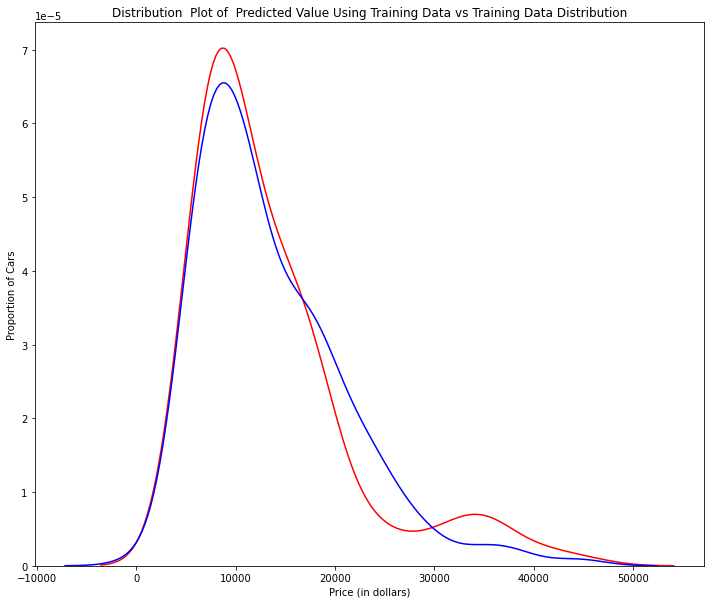

In [154]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figura 1: Plot de valores predichos usando los datos training comparados con los datos testing. 

Hasta ahora el modelo parece quedar bien aprendiendo del dataset training. Pero que pasa cuando el modelo encuentra nuevos datos del dataset testing? Cuando el modelo genera nuevos valores de los datos test, vemos que la distribucion de los valores predichos es muy diferente de los valores target. 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


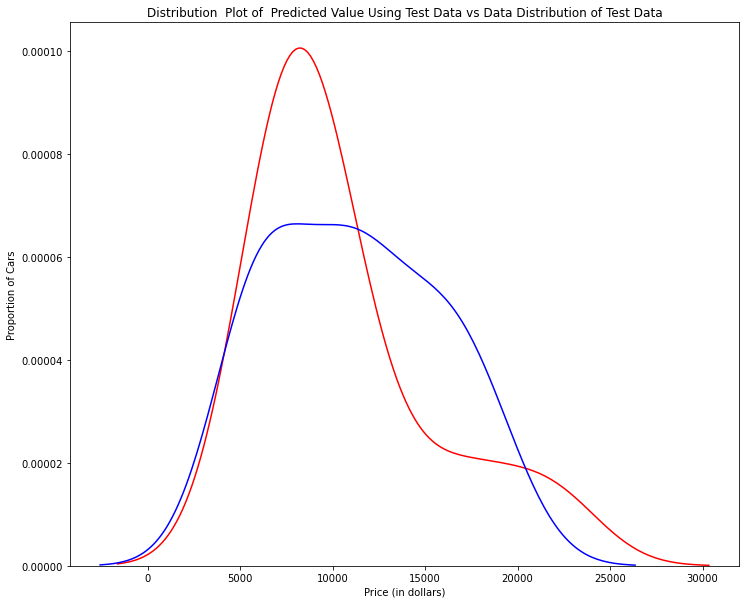

In [155]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figura 2: Plot de los valores predichos usando los datos test comparados con los datos test. 


<p>Comparando Figura 1 y Figura 2; es evidente que la distribucion de los datos test en la Figura 1 es mucho mejor ajustando los datos. Esta diferencia en la Figura 2 es aparente donde los rangos van de 5000 a 15 000. Aqui es donde la forma de la distribucion es muy diferente. Veamos si la regresion polinomial tambien exhibe una caida en la precision de la prediccion cuando analizamos los datos de test.</p>


In [156]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting ocurre cuando el modelo se ajusta al ruido, no al proceso subyacente. Por lo tanto al probar el modelo usando el conjunto test, tu modelo no realiza tan bien como al modelar el ruido, no el proceso subyacente que genera la relacion. Creemos un modelo polinomial de 5o grado.</p>

Usemos 55 por ciento de los datos para training y el resto para testing:



In [157]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Vamos a realizar una tranformacion con un polinomio de 5o grado en la variable <b>'horse power'</b>. 


In [158]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Ahora creamos un modelo de regresion lineal "poly" y lo entrenamos.


In [159]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

Podemos ver la salida de nuestro modelo usando el metodo "predict." luego asignando valores a "yhat".


In [160]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.63702958,  7307.96989706, 12213.77721798, 18893.28623041,
       19995.9928222 ])

Tomemos los primeros cinco valores predichos y los comparamos con los valores target reales.


In [161]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.63702958  7307.96989706 12213.77721798 18893.28623041]
True values: [ 6295. 10698. 13860. 13499.]


Usaremos la funcion "PollyPlot" que definimos al inicio para observar los datos training, datos testing, y la funcion predicha.


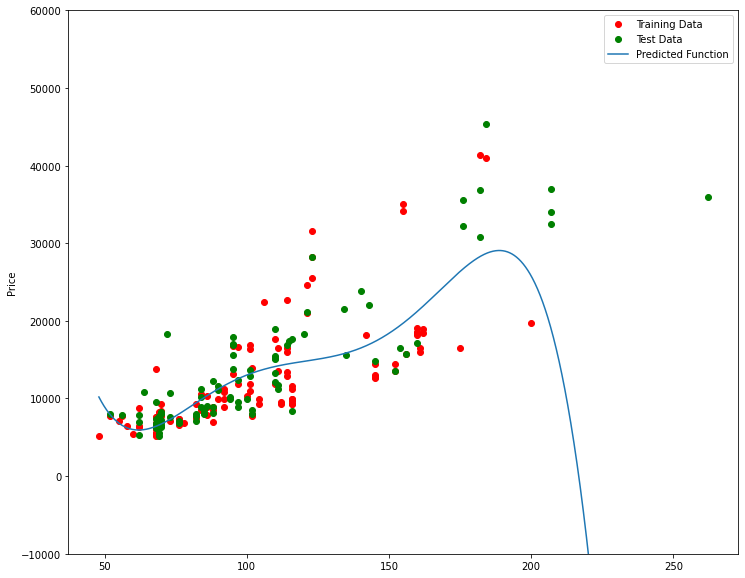

In [162]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figura 4: Un modelo de regresion polinomial, los puntos rojos representan los datos training, los puntos verdes representan los datos test, y las lineas azules representan la prediccion del modelo. 


Vemos que la funcion estimada parece rastrear los datos pero alrededor de 200 horsepower, la funcion empieza a diverger de los puntos. 


 R^2 de los datos training:


In [164]:
poly.score(x_train_pr, y_train)

0.5567716901606526

 R^2 of the test data:


In [165]:
poly.score(x_test_pr, y_test)

-29.871300058119818

Vemos que el R^2 para los datos de training es 0.5567 mientras el R^2 de los datos test fueron -29.87. El más bajo R^2, el peor modelo, un R^2 negativo es un signo de overfitting.

Veamos como cambia R^2 en los datos test para diferentes ordenes de polinomios y graficamos los resultados:


Text(3, 0.75, 'Maximum R^2 ')

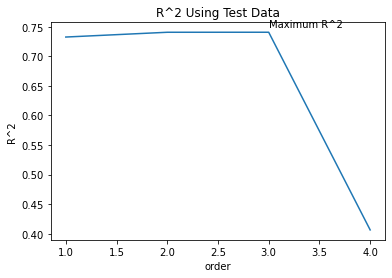

In [166]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Vemos que el R^2 incrementa gradualmente hasta que el orden del polinomio tres es usado. Entonces el R^2 decrece dramaticamente a 4.


La siguiente funcion sera usada en la siguiente seccion.


In [167]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

La siguiente interface nos permite experimentar con diferentes ordenes de polinomios y diferentes cantidades de datos.

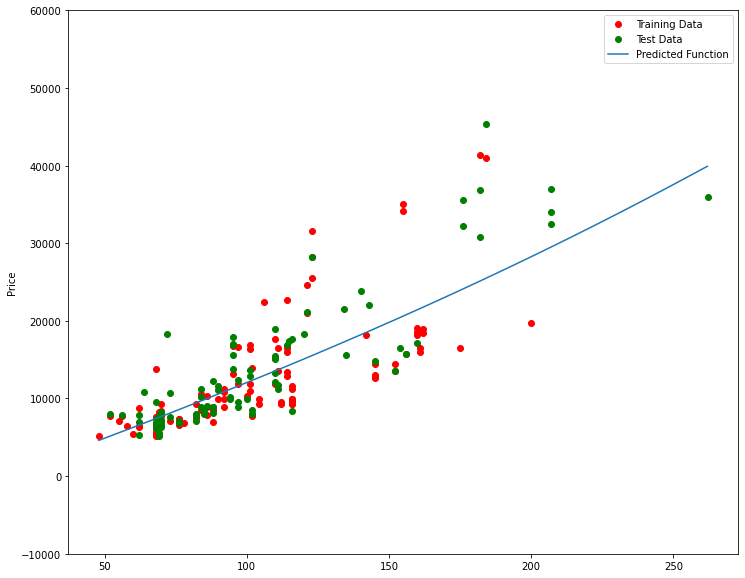

<function __main__.f(order, test_data)>

In [168]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<h2 id="ref3"> Regresion de Ridge</h2>

En esta seccion, revisaremos la regresion de Ridge, veremos como cambia el modelo con el parametro alfa. Nota: Los datos test seran usados como datos de validacion.


Realizamos una transformacion de un polinomio de grado dos a nuestros datos.



In [169]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Importamos <b>Ridge</b> del modulo <b>linear models</b>.


In [170]:
from sklearn.linear_model import Ridge

Creamos un objeto de regresion de Ridge, configurando el parametro de regularizacion a 0.1 


In [171]:
RigeModel=Ridge(alpha=0.1)

Como una regresion regular, entrenamos el modelo usando el metodo <b>fit</b>.


In [172]:
RigeModel.fit(x_train_pr, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

Y obtenemos una prediccion:

In [173]:
yhat = RigeModel.predict(x_test_pr)

Comparemos las primeras cinco muestras predichas a nuestro conjunto test. 


In [174]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326844 19347.69543464]
test set : [ 6295. 10698. 13860. 13499.]


Seleccionamos el valor de Alfa que minimiza el error de test, por ejemplo, podemos usar un ciclo for. 


In [175]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Ploteamos el valor de R^2  para diferentes Alfas: 


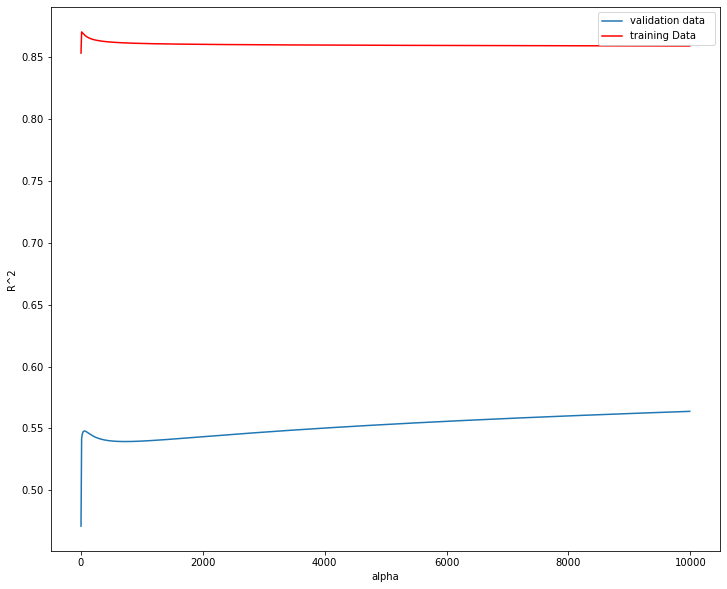

In [176]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


**Figura 6**: La linea azul representa la R^2 de los datos de validacion, y la linea roja representa la R^2 de los datos training. El eje x representa los diferentes valores de Alfa. 


Aqui el modelo se contruyo y se hizo prueba con los mismos datos. Así que los datos test son los mismos.

La linea roja en la figura 6 regresenta el R^2 delos datos training.  
Como Alfa incrementa, R^2 decrece.  
Por lo tanto, como Alfa incrementa el modelo realiza un peor trabajo en los datos training.  

La linea azul representa la R^2 de los datos de validacion.  
Como los valores de Alfa incrementan, incrementa y converge a un punto.

<h2 id="ref4"> Grid Search</h2>

El termino Alfa es un hiperparametro, sklearn tiene la clase <b>GridSearchCV</b> para hacer el proceso de encontrar el mejor hiperparametro de manera sencilla.

Importamos <b>GridSearchCV</b> del modulo <b>model_selection</b>.


In [186]:
from sklearn.model_selection import GridSearchCV

Creamos un diccionario de los valores del parametro:


In [187]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Creamos un objeto de regiones Ridge:


In [188]:
RR=Ridge()
RR

Ridge()

Creamos un objeto de busqueda grid Ridge 


In [189]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Entrenamos el modelo:

In [190]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

El objeto encuentra los mejores valores del parametro en los datos de validacion. Podemos obtener el estimador con el mejor parametro y asignarlo a la variable BestRR como sigue:


In [191]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

Ahora probamos nuestro modelo con los datos test: 


In [192]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036146